In [16]:
#loading all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Q4 Visual story telling part 2: Capital Metro data

The file capmetro_UT.csv contains data from Austin's own Capital Metro bus network, including shuttles to, from, and around the UT campus. These data track ridership on buses in the UT area. Ridership is measured by an optical scanner that counts how many people embark and alight the bus at each stop. Each row in the data set corresponds to a 15-minute period between the hours of 6 AM and 10 PM, each and every day, from September through November 2018. The variables are:

timestamp: the beginning of the 15-minute window for that row of data
boarding: how many people got on board any Capital Metro bus on the UT campus in the specific 15 minute window
alighting: how many people got off ("alit") any Capital Metro bus on the UT campus in the specific 15 minute window
day_of_week and weekend: Monday, Tuesday, etc, as well as an indicator for whether it's a weekend.
temperature: temperature at that time in degrees F
hour_of_day: on 24-hour time, so 6 for 6 AM, 13 for 1 PM, 14 for 2 PM, etc.
month: July through December
Your task is to create a figure, or set of related figures, that tell an interesting story about Capital Metro ridership patterns around the UT-Austin campus during the semester in question. Provide a clear annotation/caption for each figure, but the figure(s) should be more or less stand-alone, in that you shouldn't need many, many paragraphs to convey its meaning. Rather, the figure together with a concise caption should speak for itself as far as possible.

You have broad freedom to look at any variables you'd like here -- try to find that sweet spot where you're showing genuinely interesting relationships among more than just two variables, but where the resulting figure or set of figures doesn't become overwhelming/confusing. (Faceting/panel plots might be especially useful here.)



In [17]:
#load data file
df = pd.read_csv('capmetro_UT.csv')
df.head()

,timestamp,boarding,alighting,day_of_week,temperature,hour_of_day,month,weekend
0,2018-09-01 06:00:00,0,1,Sat,74.82,6,Sep,weekend
1,2018-09-01 06:15:00,2,1,Sat,74.82,6,Sep,weekend
2,2018-09-01 06:30:00,3,4,Sat,74.82,6,Sep,weekend
3,2018-09-01 06:45:00,3,4,Sat,74.82,6,Sep,weekend
4,2018-09-01 07:00:00,2,4,Sat,74.39,7,Sep,weekend


In [18]:
#checking for nulls and duplicates
print(df.isnull().sum())
print(df[df.duplicated() == True])

timestamp      0
boarding       0
alighting      0
day_of_week    0
temperature    0
hour_of_day    0
month          0
weekend        0
dtype: int64
Empty DataFrame
Columns: [timestamp, boarding, alighting, day_of_week, temperature, hour_of_day, month, weekend]
Index: []


In [19]:
#splitting date and time column from timestamp
df['date'] = df['timestamp'].str.split().str[0]
df['time'] = df['timestamp'].str.split().str[1]



In [20]:
df.columns

Index(['timestamp', 'boarding', 'alighting', 'day_of_week', 'temperature',
       'hour_of_day', 'month', 'weekend', 'date', 'time'],
      dtype='object')

## 1. Boarding count by day of the week

Let us start by looking at the boarding count by day of the week

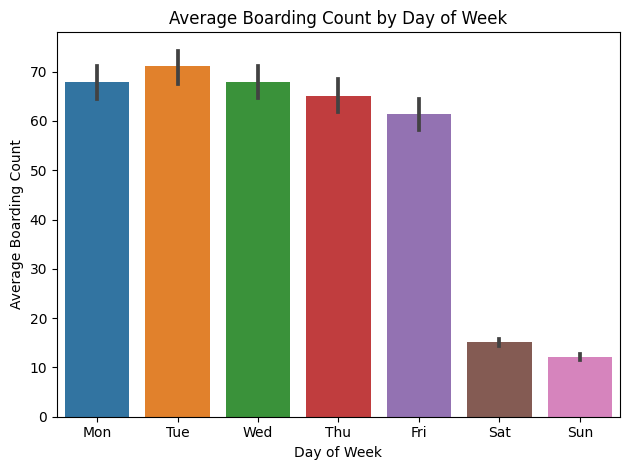

In [21]:
# Create custom order for days of the week
custom_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Plot the bar plot with the custom order
sns.barplot(data=df, x='day_of_week', y='boarding', order=custom_order)
plt.xlabel('Day of Week')
plt.ylabel('Average Boarding Count')
plt.title('Average Boarding Count by Day of Week')
plt.tight_layout()
plt.show()

We see that on average boarding count tends to remain highest on first couple of days in the week with Tuesday seeing the highest boarding count. This is probably because most students take their university classes on these days. Also, we find that ridership level on weekdays is way higher than weekends probably because most of the riders might be UT students who use the metro system for navigating through the campus.

## 2. Ridership trend by time of the day

Now let us try to look at how the ridership varies by time of the day

In [24]:
# Function to categorize hours into periods of the day
def categorize_period(hour):
    if 6 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 18:
        return 'afternoon'
    else:
        return 'evening'

# Apply the categorize_period function to create the "Period of Day" column
df['period_of_day'] = df['hour_of_day'].apply(categorize_period)

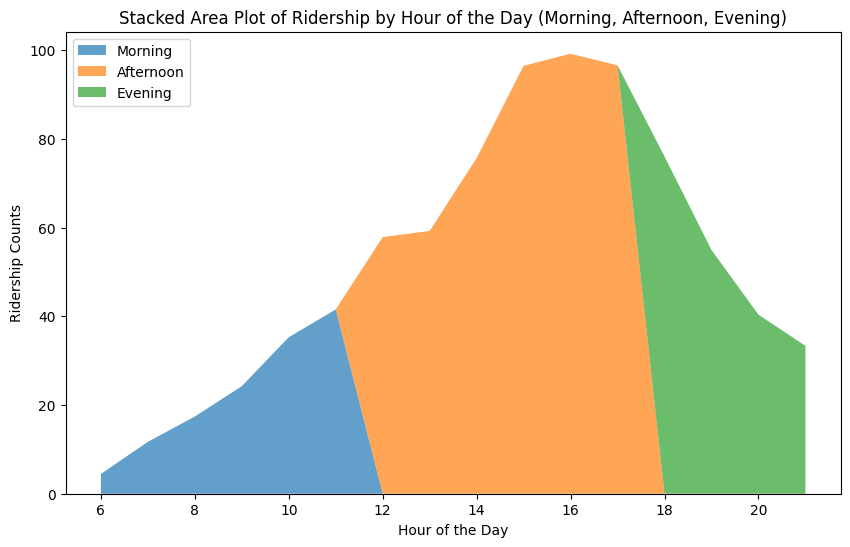

In [25]:
# Filter the data for the specific periods (morning, afternoon, evening)
filtered_df = df[df['period_of_day'].isin(['morning', 'afternoon', 'evening'])]

# Pivot the data to prepare for the stacked area plot
pivot_df = filtered_df.pivot_table(values=['boarding', 'alighting'], index='hour_of_day', columns='period_of_day', aggfunc='mean')
pivot_df.fillna(0, inplace=True)

# Reset index to use hour_of_day as a regular column
pivot_df.reset_index(inplace=True)

# Create the stacked area plot
plt.figure(figsize=(10, 6))
plt.stackplot(pivot_df['hour_of_day'], pivot_df['boarding']['morning'], pivot_df['boarding']['afternoon'],
              pivot_df['boarding']['evening'],
              labels=['Morning', 'Afternoon', 'Evening'], alpha = 0.7)
plt.title('Stacked Area Plot of Ridership by Hour of the Day (Morning, Afternoon, Evening)')
plt.xlabel('Hour of the Day')
plt.ylabel('Ridership Counts')
plt.legend(loc='upper left')
plt.show()



As expected the bulk of ridership happens during afternoon time which covers most of the university class hours. What will be interesting to check is whether this is consistent for weekdays and weekens or are there any differences.

## 3. Hourly ridership trend [weekday vs weekend]

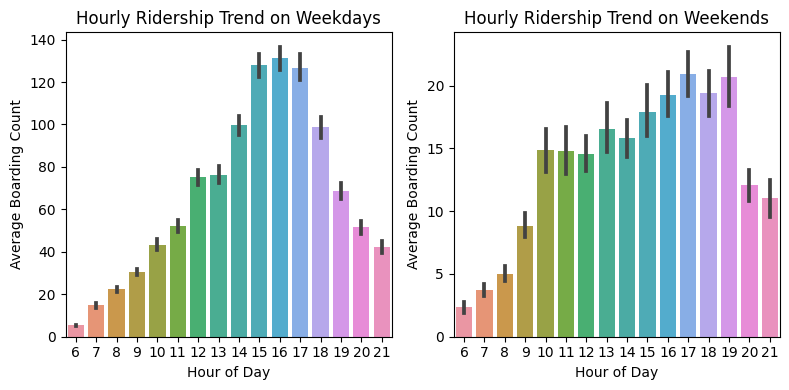

In [9]:
#Hourly ridership trends on weekdays and weekend


# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))


# Plot 1: Hourly Ridership Trend on Weekdays
hourly_weekday = df[df['weekend'] == 'weekday']
sns.barplot(data=hourly_weekday, x='hour_of_day', y='boarding', ax=axes[0])
axes[0].set_title('Hourly Ridership Trend on Weekdays')
axes[0].set_xlabel('Hour of Day')
axes[0].set_ylabel('Average Boarding Count')

# Plot 2: Hourly Ridership Trend on Weekends
hourly_weekend = df[df['weekend'] == 'weekend']
sns.barplot(data=hourly_weekend, x='hour_of_day', y='boarding', ax=axes[1])
axes[1].set_title('Hourly Ridership Trend on Weekends')
axes[1].set_xlabel('Hour of Day')
axes[1].set_ylabel('Average Boarding Count')


# Adjust layout and display
plt.tight_layout()
plt.show()

This is interesting!! While on weekdays we see a clear spike in usage from 3PM to 5PM on weekdays, the weekends tend to exhibit a consistent pattern across most of the day with afternoon still seeing the highest usage. 

One potential reason for afternoon seeing the highest ridership might be high temperature values which make it difficult to walk across the campus.
Lets check this through our data!!!

# Ridership by Temperature range

In [6]:
# Create the 'Ridership Delta' column
df['ridership_delta'] = df['boarding'] - df['alighting']

# Create the 'Temperature Range' column
def categorize_temperature(temp):
    if temp < 40:
        return 'cold'
    elif temp < 60:
        return 'mild'
    elif temp < 80:
        return 'warm'
    else:
        return 'hot'

df['temperature_range'] = df['temperature'].apply(categorize_temperature)


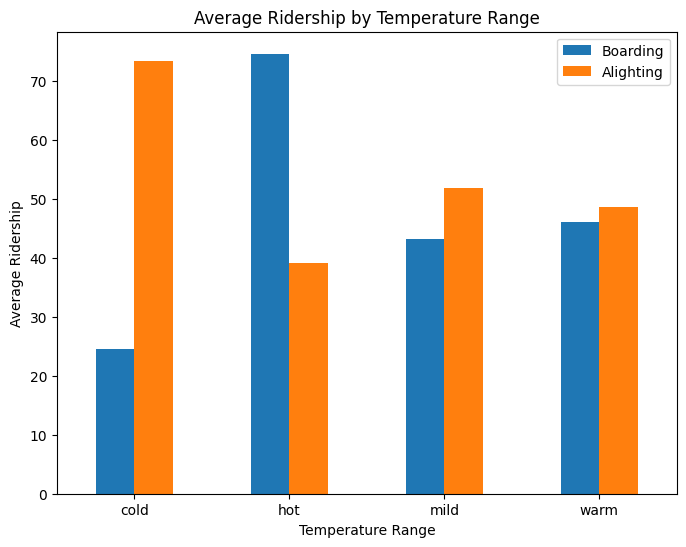

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the 'df' DataFrame with the 'temperature_range', 'boarding', and 'alighting' columns

# Group data by temperature range and calculate the average ridership
temperature_grouped = df.groupby('temperature_range')[['boarding', 'alighting']].mean()

# Create a bar plot
temperature_grouped.plot(kind='bar', figsize=(8, 6))
plt.title('Average Ridership by Temperature Range')
plt.xlabel('Temperature Range')
plt.ylabel('Average Ridership')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(['Boarding', 'Alighting'])
plt.show()

AHAAA!!! This is what we assumed. There is a clear patternbetween boarding and temperature. Generally more people tend to board the metro when the temperature outside is hot!!

## Conclusion

Let's summarize our findings below:

1.On average boarding count tends to remain highest on first couple of days in the week with Tuesday seeing the highest boarding count

2.Ridership level on weekdays is way higher than weekends

3.Bulk of ridership happens during afternoon time

4.Generally more people tend to board the metro when the temperature outside is hot